In [1]:

import os 

from os.path import join,split,exists
os.chdir(join(os.getcwd(),'..'))
from dataloaders.prediction_loaders.rind_prediction_loader import *  



In [21]:
from utils.image_utils import * 
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

loader = PredictionLoader('/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/networks/need2release/wo_containt_loss_0')
# re_mns,ie_mns,ne_nms,de_nms, merge = loader.getitem(0)
# show_imgs([re_mns,ie_mns,ne_nms,de_nms,merge,],[1,1,1,1,1])



depth {'ODS': '0.704', 'OIS': '0.736', 'AP': '0.719', 'R50': '0.861'}
normal {'ODS': '0.511', 'OIS': '0.552', 'AP': '0.462', 'R50': '0.504'}
reflectance {'ODS': '0.519', 'OIS': '0.562', 'AP': '0.466', 'R50': '0.539'}
illumination {'ODS': '0.368', 'OIS': '0.398', 'AP': '0.305', 'R50': '0.236'}
Average {'ODS': 0.525, 'OIS': 0.562, 'AP': 0.488, 'R50': 0.535}


In [58]:
from dataloaders.datasets.bsds_hd5_test import MydatasetTest


from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score




test_dataset = MydatasetTest(root_path='/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/data/BSDS-RIND/BSDS-RIND-Edge/Augmentation')


#* GT



all_gts = []
all_preds = []


for index in tqdm(range(test_dataset.__len__())):

    label = test_dataset.getitem_label(index)
    gt_edge = np.max(np.concatenate([ x[...,None] for x in label],axis = -1),axis=-1)
    # label.append(gt_edge)
    # show_imgs(label,[1]*len(label))
    


    #* prediction
    re_mns,ie_mns,ne_nms,de_nms, predicted_rind = loader.getitem_by_name(test_dataset.idx2name(index))
    # show_imgs([re_mns,ie_mns,ne_nms,de_nms,predicted_rind],[1,1,1,1,1])

    all_gts.append(gt_edge.reshape(-1))
    all_preds.append(predicted_rind.reshape(-1))



fpr, tpr, _ = roc_curve(np.concatenate(all_gts), np.concatenate(all_preds))

auroc_score_1 = auc(fpr, tpr)

print('AUROC is: ', auroc_score_1)
# print('FPR95 is: ', fpr[tpr > 0.95][0])

    



AUROC is:  0.6924198300151734
FPR95 is:  1.0


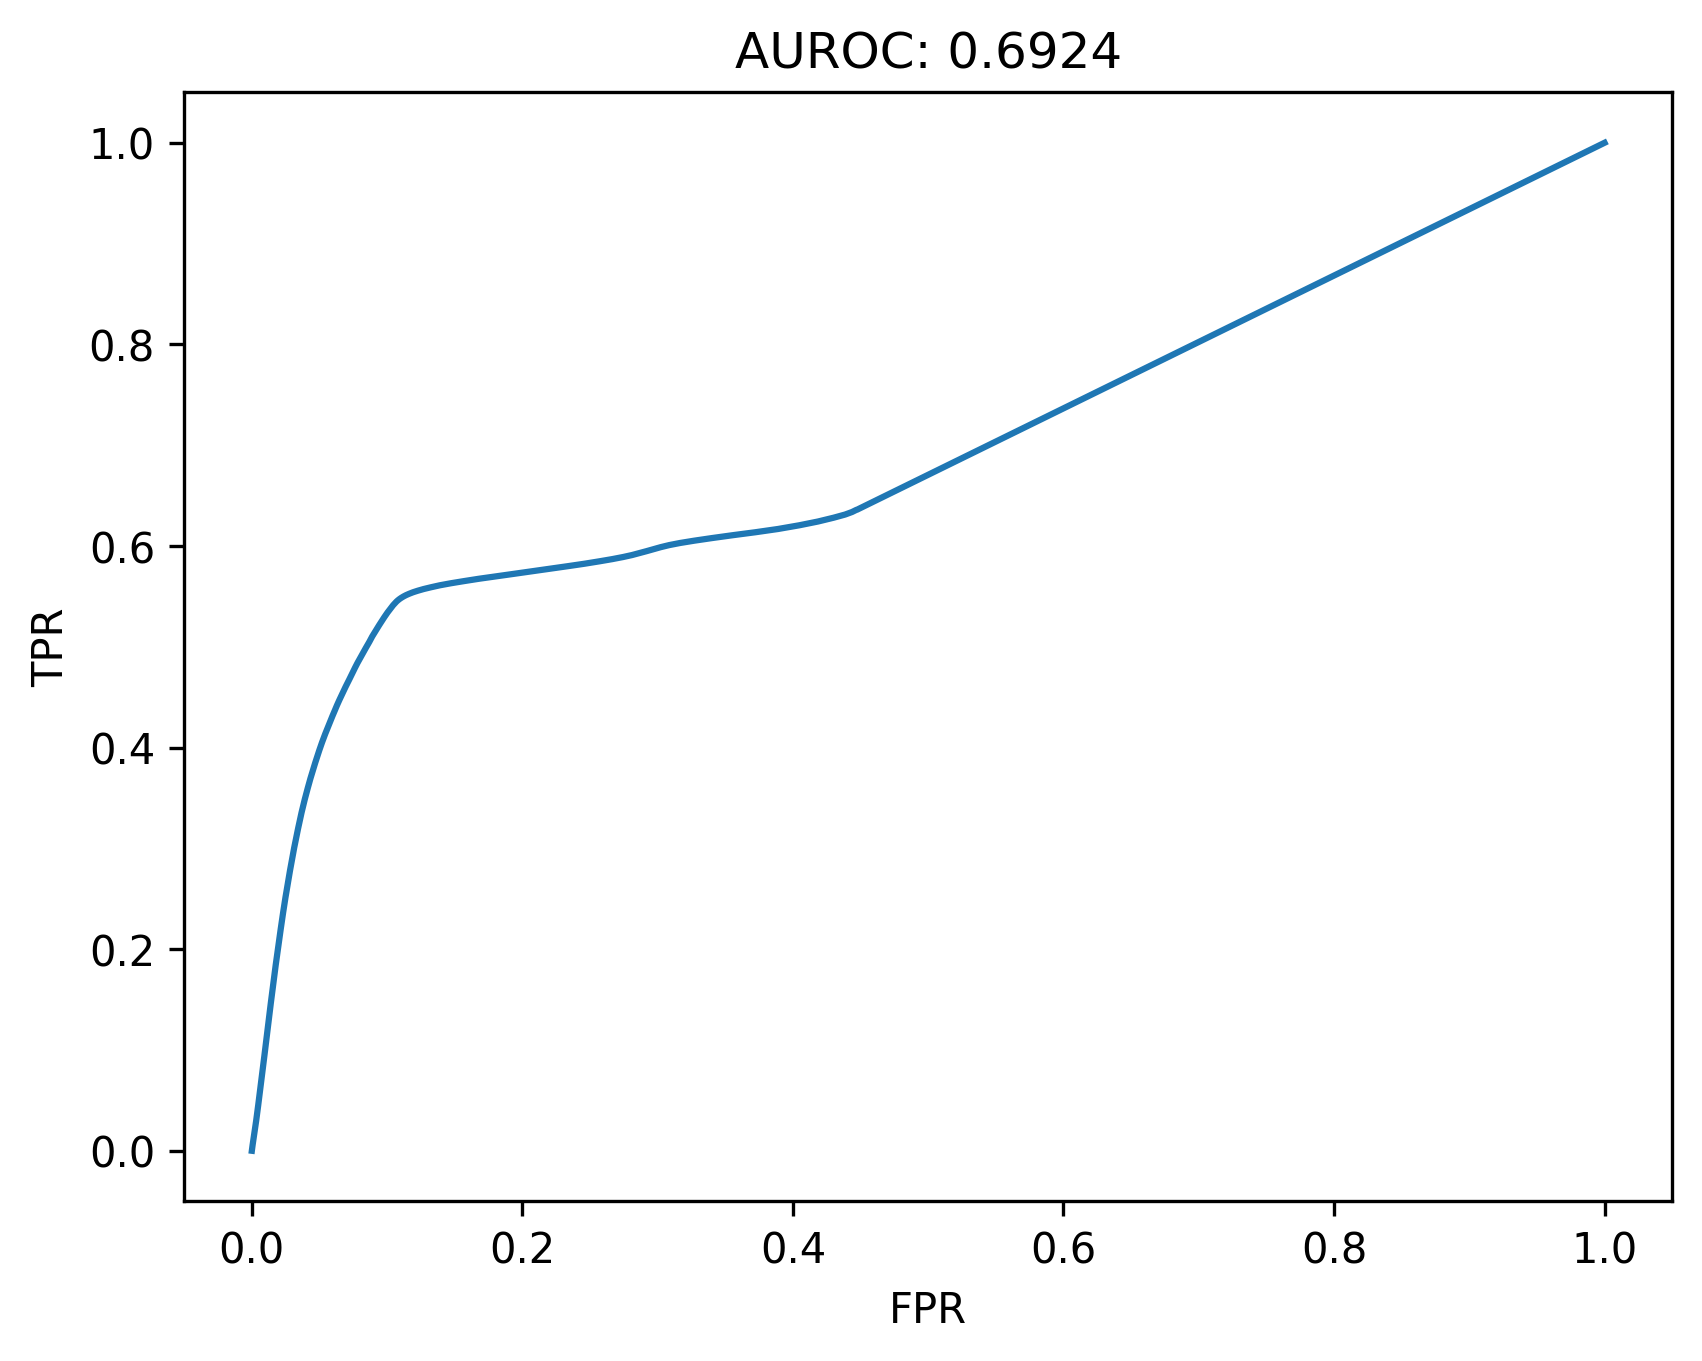

In [65]:

plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUROC: " + "%.4f"%(auroc_score_1))
plt.savefig(join('logs','AUROC.jpg'))